# 0.0. Imports

In [3]:
import pandas as pd
import math
import numpy as np
import datetime
import inflection
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import HTML

## 0.1. Helper functions

## 0.2. Loading data

In [4]:
df_sales_raw = pd.read_csv('../data/train.csv', low_memory=False)
df_test_raw = pd.read_csv('../data/test.csv', low_memory=False)
df_store_raw = pd.read_csv('../data/store.csv', low_memory=False)

# Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0. Data description

## 1.1. Rename columns

In [5]:
df_raw_1 = df_raw.copy()

old_cols = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'PromoInterval']

# Changing columns to snakecase
snakecase = lambda x: inflection.underscore(x)
new_cols = list(map(snakecase, old_cols))

# Rename columns
df_raw_1.columns = new_cols


## 1.2. Data dimensions

In [6]:
df_raw_1.shape

(1017209, 18)

## 1.3. Data Types

In [7]:
df_raw_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
store                           1017209 non-null int64
day_of_week                     1017209 non-null int64
date                            1017209 non-null object
sales                           1017209 non-null int64
customers                       1017209 non-null int64
open                            1017209 non-null int64
promo                           1017209 non-null int64
state_holiday                   1017209 non-null object
school_holiday                  1017209 non-null int64
store_type                      1017209 non-null object
assortment                      1017209 non-null object
competition_distance            1014567 non-null float64
competition_open_since_month    693861 non-null float64
competition_open_since_year     693861 non-null float64
promo2                          1017209 non-null int64
promo2_since_week               509178 non-null float6

In [8]:
# change date to datetime64
df_raw_1['date'] = pd.to_datetime(df_raw_1['date'])

## 1.4. Missing values

In [9]:
# checking NA count explicitly
df_raw_1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fillout NA

In [10]:
# competition_distance 
df_raw_1['competition_distance'].fillna(200000.0, inplace=True)

# competition_open_since_month 

    # Usar a bilbioteca math quando quiser aplicar soluções de substituição de NaN através de lambda function nas linhas, fillna
    # e replace não funcionam pois são feitas para atuar unicamente em dataframes.

df_raw_1['competition_open_since_month'] = (df_raw_1.apply(lambda x: x['date'].month 
                                                           if math.isnan(x['competition_open_since_month']) 
                                                           else x['competition_open_since_month'] , axis=1))

# competition_open_since_year     

df_raw_1['competition_open_since_year'] = (df_raw_1.apply(lambda x: x['date'].year 
                                                           if math.isnan(x['competition_open_since_year']) 
                                                           else x['competition_open_since_year'] , axis=1))
# promo2_since_week  

df_raw_1['promo2_since_week'] = (df_raw_1.apply(lambda x: x['date'].week  
                                                if math.isnan(x['promo2_since_week']) 
                                                else x['promo2_since_week'] , axis=1))

# promo2_since_year

df_raw_1['promo2_since_year'] = (df_raw_1.apply(lambda x: x['date'].year  
                                                if math.isnan(x['promo2_since_year']) 
                                                else x['promo2_since_year'] , axis=1))

# promo_interval 

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Set', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_raw_1['promo_interval'].fillna(0, inplace=True)

df_raw_1['month_map'] = df_raw_1['date'].dt.month.map(month_map)

df_raw_1['is_promo'] = df_raw_1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [11]:
df_raw_1.head(2)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul,1


## 1.6 Reviewing Columns Types and Missing values again

In [12]:
df_raw_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
store                           1017209 non-null int64
day_of_week                     1017209 non-null int64
date                            1017209 non-null datetime64[ns]
sales                           1017209 non-null int64
customers                       1017209 non-null int64
open                            1017209 non-null int64
promo                           1017209 non-null int64
state_holiday                   1017209 non-null object
school_holiday                  1017209 non-null int64
store_type                      1017209 non-null object
assortment                      1017209 non-null object
competition_distance            1017209 non-null float64
competition_open_since_month    1017209 non-null float64
competition_open_since_year     1017209 non-null float64
promo2                          1017209 non-null int64
promo2_since_week               1017209 non-

In [13]:
df_raw_1['competition_open_since_month'] = df_raw_1['competition_open_since_month'].astype(int)
df_raw_1['competition_open_since_year'] = df_raw_1['competition_open_since_year'].astype(int)

df_raw_1['promo2_since_week'] = df_raw_1['promo2_since_week'].astype(int)
df_raw_1['promo2_since_year'] = df_raw_1['promo2_since_year'].astype(int)

In [14]:
df_raw_1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistical Analysis 

In [15]:
df_raw_1.select_dtypes('number').columns

Index(['store', 'day_of_week', 'sales', 'customers', 'open', 'promo',
       'school_holiday', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo'],
      dtype='object')

In [16]:
num_attributes = df_raw_1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df_raw_1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])


### 1.7.1 Numeric Attributes

In [17]:
# central tendency - mean, median
# ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
# ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - std, variance, min, max, skew, kurtosis

# d1 = pd.DataFrame(num_attributes.apply(np.std)).T
# d2 = pd.DataFrame(num_attributes.apply(min())).T
# d3 = pd.DataFrame(num_attributes.apply(max())).T
# d4 = pd.DataFrame(num_attributes.apply(lambda x: (x.max() - x.min())).T
# d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
# d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


In [18]:
range_ = lambda x: (x.max() - x.min())

m = num_attributes.agg([np.mean, np.median, np.std, 'min', 'max', range_, 'skew', 'kurt']).T
m.rename(columns = {'<lambda>': 'range', 'kurt': 'kurtosis'})


,mean,median,std,min,max,range,skew,kurtosis
store,558.429727,558.0,321.908651,1.0,1115.0,1114.0,-0.000955,-1.200524
day_of_week,3.998341,4.0,1.997391,1.0,7.0,6.0,0.001593,-1.246873
sales,5773.818972,5744.0,3849.926175,0.0,41551.0,41551.0,0.641460,1.778375
customers,633.145946,609.0,464.411734,0.0,7388.0,7388.0,1.598650,7.091773
open,0.830107,1.0,0.375539,0.0,1.0,1.0,-1.758045,1.090723
promo,0.381515,0.0,0.485759,0.0,1.0,1.0,0.487838,-1.762018
school_holiday,0.178647,0.0,0.383056,0.0,1.0,1.0,1.677842,0.815154
competition_distance,5935.442677,2330.0,12547.652996,20.0,200000.0,199980.0,10.242344,147.789712
competition_open_since_month,6.786849,7.0,3.311087,1.0,12.0,11.0,-0.042076,-1.232607
competition_open_since_year,2010.324840,2012.0,5.515593,1900.0,2015.0,115.0,-7.235657,124.071304


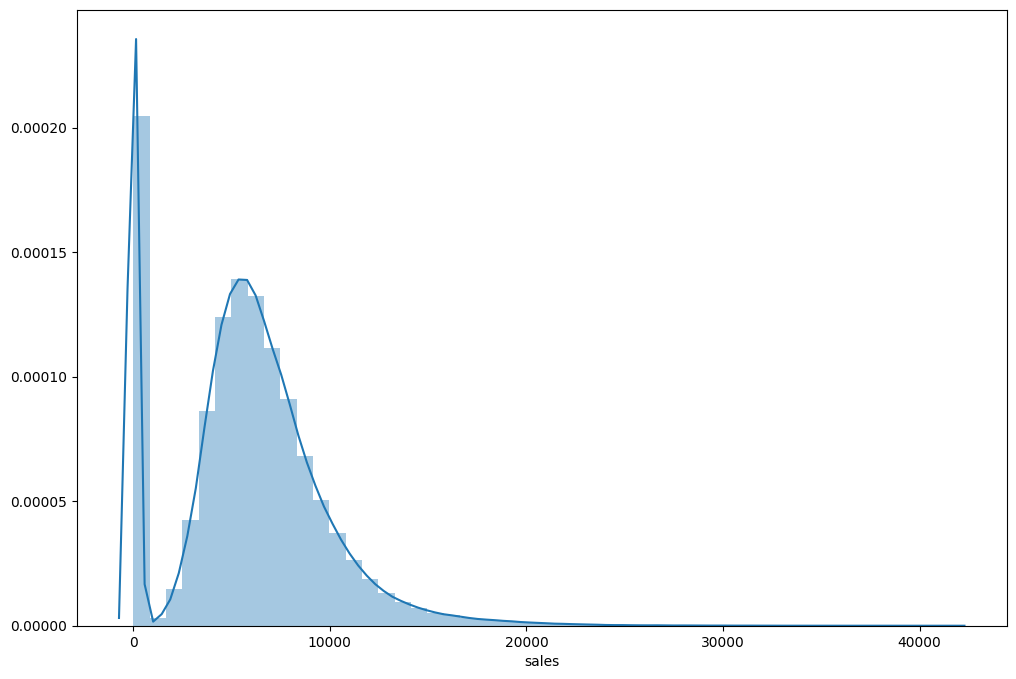

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(df_raw_1['sales'])
plt.show()

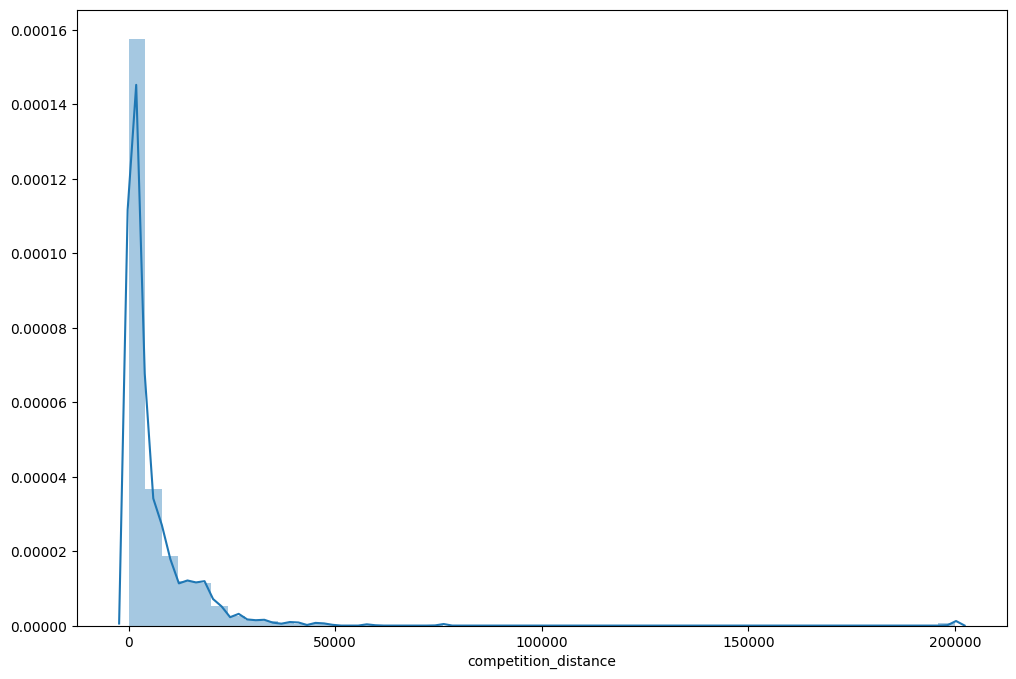

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(df_raw_1['competition_distance'])
plt.show()

### 1.7.2 Categorical Attributes

In [21]:
cat_attributes.nunique()

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

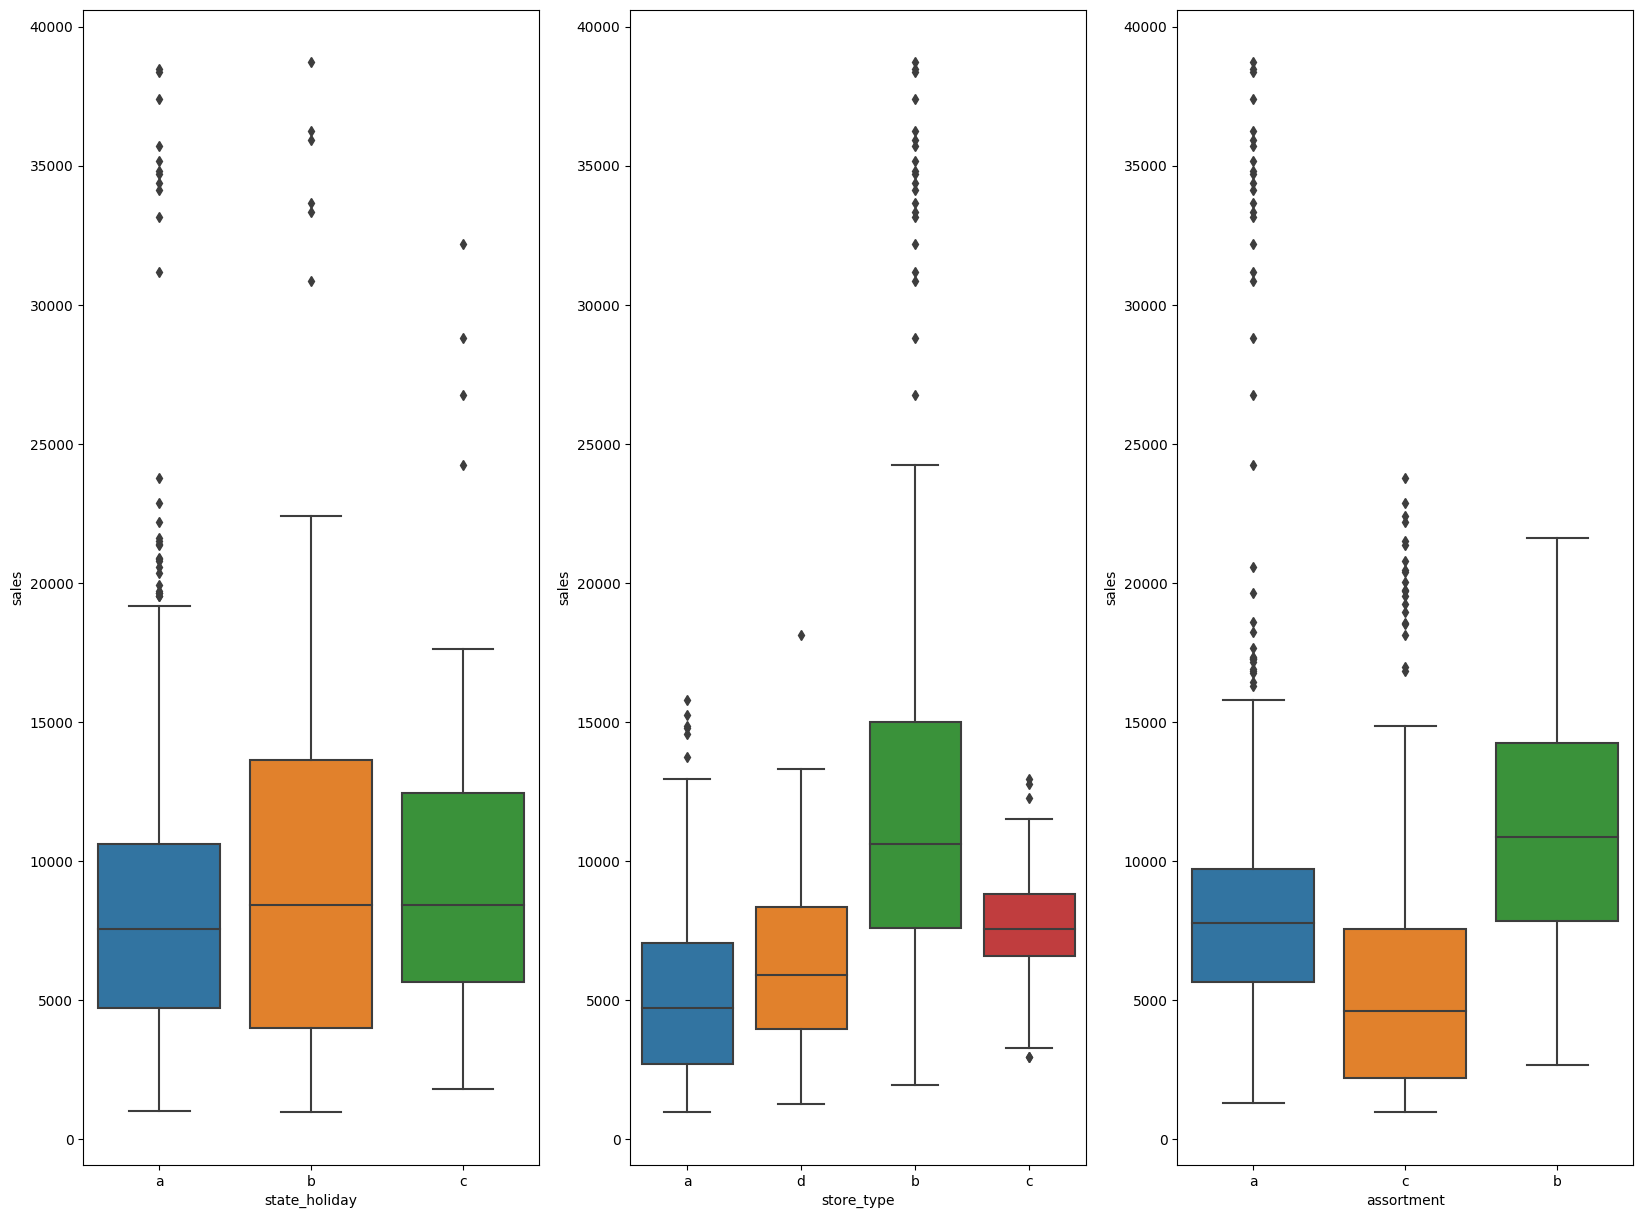

In [22]:
aux1 = df_raw_1[(df_raw_1['state_holiday'] != '0') & (df_raw_1['sales'] > 0)]

plt.figure(figsize=(20,15))

plt.subplot(1,3,1)
sns.boxplot(x= 'state_holiday', y= 'sales', data= aux1)

plt.subplot(1,3,2)
sns.boxplot(x= 'store_type', y= 'sales', data= aux1)

plt.subplot(1,3,3)
sns.boxplot(x= 'assortment', y= 'sales', data= aux1)

plt.show()

# 2.0. Feature Engineering

In [23]:
df2 = df_raw_1.copy()

## 2.1. Hypothesis Mind Map

In [24]:
# Fazer o mapa no Coggle e importar com Ipython.core image library

## 2.2. Hypothesis Creation

In [25]:
# Brainstorm reunion or making up by yourself

## 2.3. Final Hypothesis List

In [26]:
# Selection of highest priority hypothesis

## 2.4. Feature engineering 

In [56]:
#year
df2['year'] = df2['date'].dt.year

#month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week of year
df2['week_of_year'] = df2['date'].dt.weekofyear

# year - week (mask)
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

#competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)

# versão simplificada do script da aula
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).dt.days

# converte ano-semana da promo em data da promo e calcula a diferença entre a data da promo e a data do registro de venda 
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).dt.days

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')


In [ ]:
# versão que eu acho correta usando o módulo da diferença
# (np.abs((df2['date'] - df2['competition_since'])/30)).dt.days 

In [57]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
